## Linear Regression using Scikit-learn

In [6]:
# Importing dependencies
import numpy as np  # For scientific computation
import matplotlib.pyplot as plt  # For plotting data
from sklearn.linear_model import SGDRegressor  # Open source toolkit to fit linear regression model using GD
from sklearn.preprocessing import StandardScaler  # Open source toolkit normalize input features using z-score normalization
from utils import  load_house_data
from utils_common import dlc

In [8]:
# Loading the dataset
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

In [9]:
# Scaling/Normalizing the training data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.8452591  6.13529646 2.05626214 3.68533012]


In [10]:
# Creating and fitting the regression model to the training data
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 129, number of weight updates: 12772.0


In [11]:
# Viewing parameters
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [110.23227545 -21.10027844 -32.51431715 -38.01780778], b:[363.16383467]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [12]:
# Making predictions
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.19572865 485.92059367 389.59755376 492.08388633]
Target values 
[300.  509.8 394.  540. ]


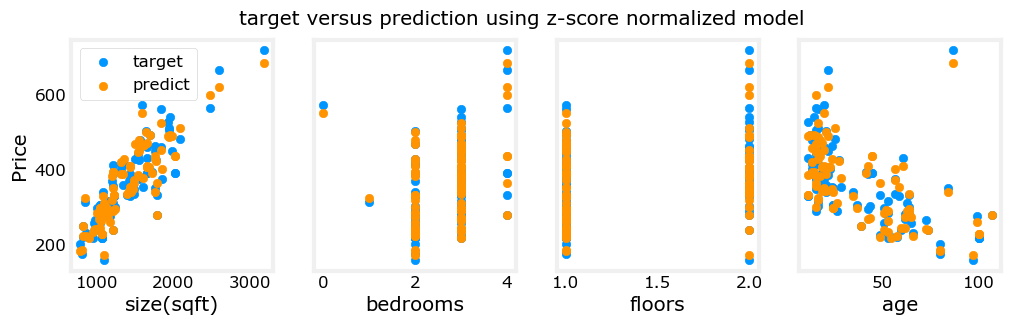

In [13]:
# Plotting results
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()